In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Metadata
This notebook showcases the original data from the Zooniverse project. Each audio clip is 2 seconds in length and overlaps 50% with other audio clips in the whole dataset.

As the dataset is comprised of 4 recording groups, to simplify use we exported the non-overlapping 1 second clips into ```data/audio_1sec``` and supply the labels in ```labels/audio_1sec.csv```. The labels included the number of ```{yes, no, not_sure}``` votes and the subject ID. Code to make classifications is found in ```notebooks/baseline.ipynb```.

The code in this notebook is supplied to re-produce the metadata plots of the paper. We strongly recommend using the data in ```data/audio_1sec``` for analysis and subsequent use, but include this data (```data/Zoo_segment/sounds``` and corresponding ```labels/coarse_data_2sec.csv```) for completeness.


In [2]:
df_full = pd.read_csv('../labels/coarse_data_2sec.csv', index_col=0)
labeller_ids, labeller_counts = np.unique(df_full['labeller_id'], return_counts=True)

In [3]:
audio_ids, count = np.unique(df_full.index, return_counts=True)  # For size of final matrix
y = np.zeros((len(audio_ids), 2))

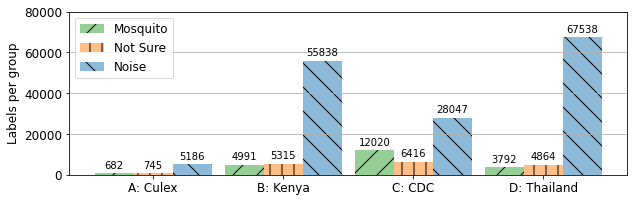

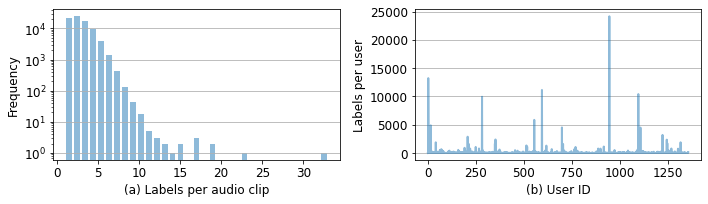

In [6]:
font = {'size'   : 12}

matplotlib.rc('font', **font)

# Convert subject set names to groups A, B, C, D from dataframe

df_Culex = df_full[df_full['subject_set'] == 'Culex Q']
df_Kenya = df_full[df_full['subject_set'] == 'Kenya']
df_CDC = df_full[df_full['subject_set'] == 'CDC']
df_date = df_full[df_full['subject_set'] == '17/11/2017']

labels = ['A: Culex', 'B: Kenya', 'C: CDC', 'D: Thailand']


x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

Not_sure_vector = [len(df_Culex[df_Culex['sound_type'] == 'not_sure']),
                   len(df_Kenya[df_Kenya['sound_type'] == 'not_sure']),
               len(df_CDC[df_CDC['sound_type'] == 'not_sure']),
               len(df_date[df_date['sound_type'] == 'not_sure'])]

Noise_vector = [len(df_Culex[df_Culex['sound_type'] == 'background']),
               len(df_Kenya[df_Kenya['sound_type'] == 'background']),
               len(df_CDC[df_CDC['sound_type'] == 'background']),
               len(df_date[df_date['sound_type'] == 'background'])]

Mosquito_vector = [len(df_Culex[df_Culex['sound_type'] == 'mosquito']),
               len(df_Kenya[df_Kenya['sound_type'] == 'mosquito']),
               len(df_CDC[df_CDC['sound_type'] == 'mosquito']),
               len(df_date[df_date['sound_type'] == 'mosquito'])]



# First figure
plt.figure(figsize=(10,3))
rects1 = plt.bar(x - width, Mosquito_vector, width, label='Mosquito', alpha=0.5, hatch='/', color='C2')
rects2 = plt.bar(x , Not_sure_vector, width, label='Not Sure', alpha=0.5,  color='C1',hatch='|')
rects3 = plt.bar(x + width, Noise_vector, width, label='Noise', alpha=0.5, hatch='\\', color='C0')




# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Labels per group')
# plt.xlabel('(c) Group')
plt.xticks(x, labels)
plt.legend(loc='upper left')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10 )



autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.grid(axis='y')
plt.ylim([0,80000])

# Subplots 

fig, ax = plt.subplots(1,2, figsize=(10,3))


ax[0].hist(count, bins=33, log=True, alpha=0.5, rwidth=0.7, align='mid')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('(a) Labels per audio clip')
# ax[0].tick_params(axis ='both', which ='both', length = 2) 


ax[1].plot(labeller_counts, '-', alpha=0.5, linewidth=2) ## sort
ax[1].set_ylabel('Labels per user')
ax[1].set_xlabel('(b) User ID')


# ax[0].minorticks_on()



ax[0].grid(axis='y')
ax[1].grid(axis='y')


plt.tight_layout()
# plt.savefig('Metadata_raw.pdf')
plt.show()
